In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split , KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.base import clone

In [52]:
df=pd.read_csv('Train.csv')

In [53]:
df.isnull().sum()
df.describe()


,B,C,D,E,F,G,H,Target
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.525750,0.409254,0.140070,0.834224,0.362219,0.181684,0.240351,9.964879
std,0.119131,0.098557,0.042661,0.491449,0.223000,0.109317,0.139567,3.229146
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.444000,0.187000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.145000,0.804500,0.339500,0.171750,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.156750,0.506500,0.255000,0.330000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<ipython-input-54-d41c670d8d84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


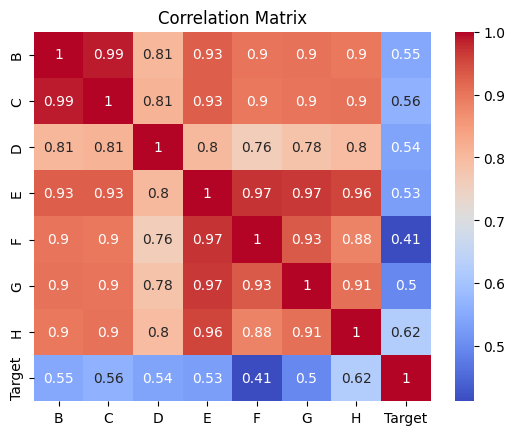

In [54]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [55]:
df['A'].unique()


array(['F', 'M', 'I'], dtype=object)

In [56]:
df['Target'].unique()


array([ 9, 12, 10, 15,  6,  8,  5, 11,  7, 14, 20, 13,  4, 16, 23, 17, 19,
        3, 18, 21, 29,  2, 22, 26, 27,  1, 24, 25])

# Feature Engineering

> I have done feature enginerring by adding some features or doing some transformation withany of the given features.

> New features can help to capture underlying patterns in data.

> by doing polynomial transformation, we can capture non linear relationship between features.













# One Hot encoding

> categorical column is converted into vector by one hot encoding , here there is no order in values of categorical column, so we should use one hot encoding than label encoding.



In [57]:
# Encode categorical variable using one-hot encoding
onehot_encoded = pd.get_dummies(df['A'], prefix='A')

# Concatenate the original DataFrame with the encoded columns
df = pd.concat([df, onehot_encoded], axis=1)

# Remove the original categorical column
df.drop('A', axis=1, inplace=True)

# Adding a new feature by taking the interaction of two existing features
df['f1'] = df['B'] * df['C']
df['f3'] = df['E'] * df['F'] + df['G']
df['f2']= df['B']**2
df['f4']= df['C']**2
df['f5']= df['D']**2
df['f6']= df['E']**2
df['f7']= df['F']**2
df['f8']= df['G']**2
df['f9']= df['H']**2
df['f10'] = df['D'] + df['E']
df['f11'] = df['F'] + df['G']



target_col = df.pop('Target')
df['Target'] = target_col  # Add the target column at the last position
print(df)


          B      C      D       E       F       G      H  A_F  A_I  A_M  ...  \
0     0.615  0.455  0.135  1.0590  0.4735  0.2630  0.274    1    0    0  ...   
1     0.515  0.395  0.140  0.6860  0.2810  0.1255  0.220    1    0    0  ...   
2     0.660  0.530  0.175  1.5830  0.7395  0.3505  0.405    0    0    1  ...   
3     0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150    0    0    1  ...   
4     0.495  0.400  0.155  0.8085  0.2345  0.1155  0.350    0    0    1  ...   
...     ...    ...    ...     ...     ...     ...    ...  ...  ...  ...  ...   
3127  0.490  0.400  0.115  0.5690  0.2560  0.1325  0.145    1    0    0  ...   
3128  0.670  0.550  0.190  1.3905  0.5425  0.3035  0.400    1    0    0  ...   
3129  0.510  0.395  0.125  0.5805  0.2440  0.1335  0.188    0    0    1  ...   
3130  0.575  0.465  0.120  1.0535  0.5160  0.2185  0.235    0    0    1  ...   
3131  0.595  0.475  0.160  1.1405  0.5470  0.2310  0.271    1    0    0  ...   

            f2        f4        f5     

In [58]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x.shape)
print(y.shape)


(3132, 21)
(3132,)


<ipython-input-59-4a79854f2fbd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_2= df_test.corr()


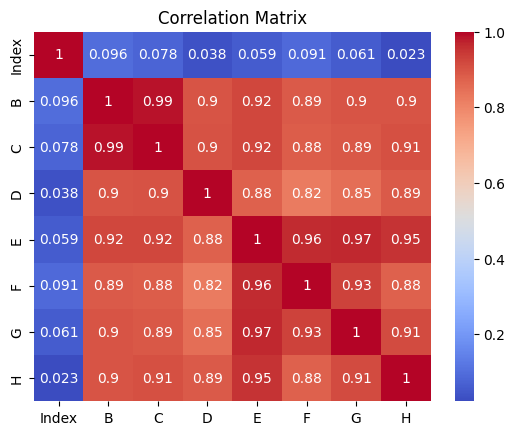

In [59]:
df_test=pd.read_csv('Test.csv')
correlation_matrix_2= df_test.corr()
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# > Same feature enginerring and one hot coding is applied to test data before making predictions.



In [60]:
# Encode categorical variable using one-hot encoding
onehot_encoded = pd.get_dummies(df_test['A'], prefix='A')

# Concatenate the original DataFrame with the encoded columns
df_test = pd.concat([df_test, onehot_encoded], axis=1)

# Remove the original categorical column
df_test.drop('A', axis=1, inplace=True)

# Adding a new feature by taking the interaction of two existing features
df_test['f1'] = df_test['B'] * df_test['C']
df_test['f3'] = df_test['E'] * df_test['F'] + df_test['G']
df_test['f2']= df_test['B']**2
df_test['f4']= df_test['C']**2
df_test['f5']= df_test['D']**2
df_test['f6']= df_test['E']**2
df_test['f7']= df_test['F']**2
df_test['f8']= df_test['G']**2
df_test['f9']= df_test['H']**2
df_test['f10'] = df_test['D'] + df_test['E']
df_test['f11'] = df_test['F'] + df_test['G']


#removing index column
x_test=df_test.iloc[:, 1:].values
print(x_test)


[[0.605    0.455    0.16     ... 0.105625 1.2635   0.7225  ]
 [0.59     0.44     0.15     ... 0.060025 1.0225   0.602   ]
 [0.56     0.445    0.195    ... 0.112225 1.176    0.5295  ]
 ...
 [0.635    0.51     0.185    ... 0.142129 1.493    0.862   ]
 [0.46     0.375    0.14     ... 0.042025 0.6505   0.2965  ]
 [0.53     0.385    0.125    ... 0.0324   0.7945   0.44    ]]


# K fold cross validation
# Linear multiple regression

> Firstly, i have divided training data into training + validation set. then K fold cross validation is used to make predictions on validation set.




In [61]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

k = 10 # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

errors = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    lr = LinearRegression()
    lr.fit(X_train_fold, y_train_fold)
    y_pred = lr.predict(X_val_fold)
    error = mean_squared_error(y_val_fold, y_pred)
    errors.append(error)

avg_error = np.mean(errors)
print("Average RMSE:", np.sqrt(avg_error))


Average RMSE: 2.136503622184153


# Support vector regression

In [62]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

errors = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    svr = SVR()  # Use SVR for Support Vector Regression
    svr.fit(X_train_fold, y_train_fold)
    y_pred = svr.predict(X_val_fold)
    error = mean_squared_error(y_val_fold, y_pred)
    errors.append(error)

avg_error = np.mean(errors)
print("Average RMSE:", np.sqrt(avg_error))


Average RMSE: 2.325731054826543


# decision tree regression

In [63]:

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

errors = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    dt = DecisionTreeRegressor()  # Use DecisionTreeRegressor for Decision Trees
    dt.fit(X_train_fold, y_train_fold)
    y_pred = dt.predict(X_val_fold)
    error = mean_squared_error(y_val_fold, y_pred)
    errors.append(error)

avg_error = np.mean(errors)
print("Average RMSE:", np.sqrt(avg_error))


Average RMSE: 3.1008768954131023


# Random forest regression

In [64]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

errors = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    rf = RandomForestRegressor()  # Use RandomForestRegressor for ensemble modeling
    rf.fit(X_train_fold, y_train_fold)
    y_pred = rf.predict(X_val_fold)
    error = mean_squared_error(y_val_fold, y_pred)
    errors.append(error)

avg_error = np.mean(errors)
print("Average RMSE:", np.sqrt(avg_error))


Average RMSE: 2.193082068922813


# Ridge regression

> Ridge regression helps to rewduce overfitting. we can adjust alpha to get rid of overfitting. if alpha value is high, then bigger the penalty is, and coefficients value will be reduced. so it helps when features are correlated.

> here most of the features are correlated and correlation is much high, so ridge regression helps us to handle overfitting  issue.




In [65]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

errors = []

alpha = 0.7 # Regularization parameter for Ridge regression

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_fold, y_train_fold)
    y_pred = ridge.predict(X_val_fold)
    error = mean_squared_error(y_val_fold, y_pred)
    errors.append(error)

avg_error = np.mean(errors)
print("Average RMSE:", np.sqrt(avg_error))


Average RMSE: 2.162923696910899


# Ensembling

> I have done Ensembling of all models except decision Tree regression, this is giving least RMSE on validation dataset.

> Value of RMSE is 1.95758





In [66]:
# Create an ensemble of the four models

ensemble = [clone(lr), clone(svr), clone(rf), clone(ridge)]
for model in ensemble:
    model.fit(X_train, y_train)

# Make predictions using the ensemble
ensemble_pred = [model.predict(X_val) for model in ensemble]
ensemble_pred = sum(ensemble_pred) / len(ensemble_pred)

# Calculate the mean squared error for the ensemble
ensemble_mse = mean_squared_error(y_val, ensemble_pred)
print("Ensemble RMSE is: " , np.sqrt(ensemble_mse))

# prediction  on x_test
ensemble_pred_test = [model.predict(x_test) for model in ensemble]
ensemble_pred_test = sum(ensemble_pred_test) / len(ensemble_pred_test)
Index=df_test['Index']
df_final= pd.DataFrame(Index, columns = ['Index'])
df_final['Target']= ensemble_pred_test
df_final.to_csv("submission13.csv", index=False)

Ensemble RMSE is:  1.9575819561604317
